In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Typical way to render matplotlib plots directly within the notebook cells.
# This means that plots will appear right below the code cell that generates them,
# without the need for explicitly calling plt.show().

Case1-1: Single variable (numpy)

Define $f(x)=x^2$, $f'(x)=2x$

In [5]:
f = lambda x :x**2

grad_f = lambda x: 2*x

Gradient Descent?

$x_{n+1}= x_{n}-\eta f'(x_{n}),$

where $\eta=0.1$ $x_0=1$

In [27]:
x = 1 #initial guess x_0
eta = 0.1      # learning rate

In [28]:
n_iter = 50    # num. iteration

x_history = [x]
for i in range(n_iter):
    grad = grad_f(x)
    x = x - eta * grad   # gradient descent update!!
    x_history.append(x)
    if i % 10 == 0:

      print(f"iter {i+1:2d}: x = {x:.5f}, f(x) = {f(x):.5f}")

iter  1: x = 0.80000, f(x) = 0.64000
iter 11: x = 0.08590, f(x) = 0.00738
iter 21: x = 0.00922, f(x) = 0.00009
iter 31: x = 0.00099, f(x) = 0.00000
iter 41: x = 0.00011, f(x) = 0.00000


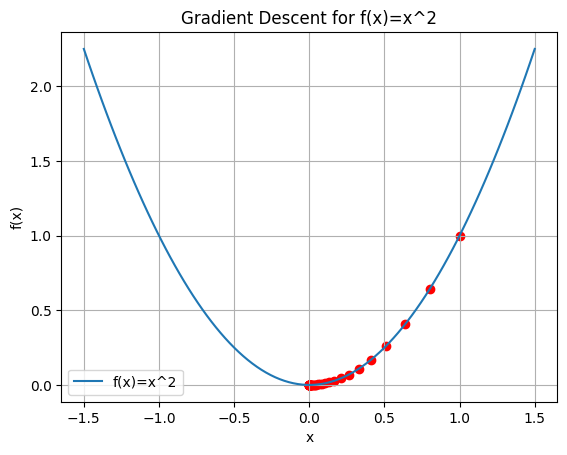

In [29]:
xs = np.linspace(-1.5, 1.5, 100)
plt.plot(xs, f(xs), label='f(x)=x^2')
plt.scatter(x_history, [f(xi) for xi in x_history], color='red')
plt.title('Gradient Descent for f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Case1-2: Single variable (pytorch)

Define $f(x)=x^2$, $f'(x)=2x$

In [40]:
import torch

In [43]:
f = lambda x :x**2

In [44]:
# 초기값 설정: x_0 = 1, gradient 추적 켜기
x = torch.tensor([1.0], requires_grad=True)

learning_rate = 0.1
n_iter = 20

In [45]:
for i in range(n_iter):
    # 1. Forward pass: compute f(x) = x^2
    f = x**2

    # 2. Clear old gradients (PyTorch accumulates them by default)
    if x.grad is not None:
        x.grad.zero_()

    # 3. Backward pass: compute df/dx and store it in x.grad
    f.backward()

    # 4. Parameter update (disable gradient tracking during manual updates)
    with torch.no_grad():
        x -= learning_rate * x.grad

    # 5. Re-enable gradient tracking for the updated x
    x.requires_grad_(True)

    print(f"iter {i+1:2d}: x = {x.item():.6f}, f(x) = {(x**2).item():.6f}")

iter  1: x = 0.800000, f(x) = 0.640000
iter  2: x = 0.640000, f(x) = 0.409600
iter  3: x = 0.512000, f(x) = 0.262144
iter  4: x = 0.409600, f(x) = 0.167772
iter  5: x = 0.327680, f(x) = 0.107374
iter  6: x = 0.262144, f(x) = 0.068719
iter  7: x = 0.209715, f(x) = 0.043980
iter  8: x = 0.167772, f(x) = 0.028147
iter  9: x = 0.134218, f(x) = 0.018014
iter 10: x = 0.107374, f(x) = 0.011529
iter 11: x = 0.085899, f(x) = 0.007379
iter 12: x = 0.068719, f(x) = 0.004722
iter 13: x = 0.054976, f(x) = 0.003022
iter 14: x = 0.043980, f(x) = 0.001934
iter 15: x = 0.035184, f(x) = 0.001238
iter 16: x = 0.028147, f(x) = 0.000792
iter 17: x = 0.022518, f(x) = 0.000507
iter 18: x = 0.018014, f(x) = 0.000325
iter 19: x = 0.014412, f(x) = 0.000208
iter 20: x = 0.011529, f(x) = 0.000133


Case2: function with several variables

$f(x,y)=x^2+y^2$

$\nabla f=(2x,2y)$

In [34]:
f = lambda x, y: x**2 + y**2
grad_f = lambda x, y: np.array([2*x, 2*y])

In [35]:
x, y = 1.0, 1.0
eta = 0.1
n_iter = 30

In [36]:
history = [(x, y)]

In [37]:
for i in range(n_iter):
    grad = grad_f(x, y)
    x = x - eta * grad[0]
    y = y - eta * grad[1]
    history.append((x, y, f(x, y)))
    print(f"iter {i+1:2d}: x={x:.5f}, y={y:.5f}, f(x,y)={f(x,y):.5f}")

iter  1: x=0.80000, y=0.80000, f(x,y)=1.28000
iter  2: x=0.64000, y=0.64000, f(x,y)=0.81920
iter  3: x=0.51200, y=0.51200, f(x,y)=0.52429
iter  4: x=0.40960, y=0.40960, f(x,y)=0.33554
iter  5: x=0.32768, y=0.32768, f(x,y)=0.21475
iter  6: x=0.26214, y=0.26214, f(x,y)=0.13744
iter  7: x=0.20972, y=0.20972, f(x,y)=0.08796
iter  8: x=0.16777, y=0.16777, f(x,y)=0.05629
iter  9: x=0.13422, y=0.13422, f(x,y)=0.03603
iter 10: x=0.10737, y=0.10737, f(x,y)=0.02306
iter 11: x=0.08590, y=0.08590, f(x,y)=0.01476
iter 12: x=0.06872, y=0.06872, f(x,y)=0.00944
iter 13: x=0.05498, y=0.05498, f(x,y)=0.00604
iter 14: x=0.04398, y=0.04398, f(x,y)=0.00387
iter 15: x=0.03518, y=0.03518, f(x,y)=0.00248
iter 16: x=0.02815, y=0.02815, f(x,y)=0.00158
iter 17: x=0.02252, y=0.02252, f(x,y)=0.00101
iter 18: x=0.01801, y=0.01801, f(x,y)=0.00065
iter 19: x=0.01441, y=0.01441, f(x,y)=0.00042
iter 20: x=0.01153, y=0.01153, f(x,y)=0.00027
iter 21: x=0.00922, y=0.00922, f(x,y)=0.00017
iter 22: x=0.00738, y=0.00738, f(x

In [38]:
x_hist = [p[0] for p in history]
y_hist = [p[1] for p in history]

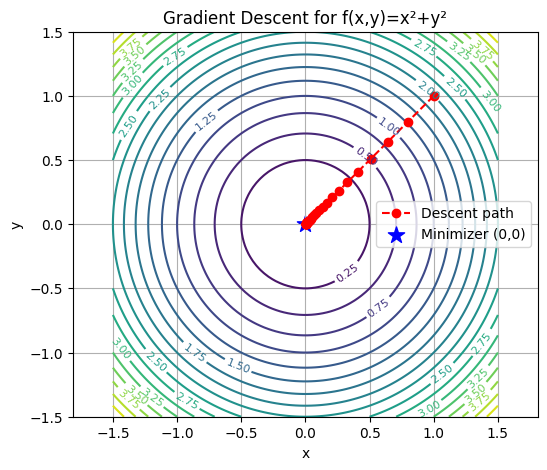

In [39]:
# contour plot 준비
X = np.linspace(-1.5, 1.5, 100)
Y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# contour plot
plt.figure(figsize=(6, 5))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(x_hist, y_hist, 'ro--', label='Descent path')
plt.scatter(0, 0, color='blue', marker='*', s=150, label='Minimizer (0,0)')
plt.title('Gradient Descent for f(x,y)=x²+y²')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()